In [169]:
import pandas as pd 
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
from sklearn.metrics import r2_score
import seaborn as sns

In [170]:
#cov, film, mus
#14-de
#17-it
#20-nl
#23-pt

data = pd.read_csv('casc14.txt', sep=" ", header=None)
data.columns = ["Tweet", "C", "a", "g", "shift", "r"]
data.head()

,Tweet,C,a,g,shift,r
0,5038821,4.528405,-5.998195,0.001149,4.808499e+06,0.904472
1,5038822,46.964912,-3.324431,0.000319,9.704538e+06,0.951828
2,5038823,5.606100,-3.835689,0.000162,3.230260e+06,0.933727
3,5038825,4.500000,-3.134083,0.001381,7.579500e+06,0.850000
4,5038826,4.532318,-6.848319,0.001505,1.087807e+07,0.933776


In [171]:
len(data)

341255

In [172]:
data_err = pd.read_csv('de_cov_cascatas_err1.txt', sep=" ", header=None)
len(data_err)

12671

In [173]:
data=data[data.r>0.85]

In [174]:
len(data)

320629

In [175]:
C = data['C']
ag = -1 * data['a'] 
g = data['g']
#shift = data['shift']
r = data['r']
a = -1 * data['a']*data['g']
a.columns = ["a"]

In [176]:
dfc = pd.DataFrame(C)
dfc['a'] = a
dfc['g'] = g
dfc['z'] = np.exp(ag)

data_corr = dfc[['C', 'a', 'g', 'z']]
#data_corr.head()
corr_df =  data_corr.corr(method='spearman')
corr_df.head()

/home/phccduarte/venv2/myenv2/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,C,a,g,z
C,1.000000,-0.341732,-0.442650,0.008163
a,-0.341732,1.000000,0.925268,0.689309
g,-0.442650,0.925268,1.000000,0.404862
z,0.008163,0.689309,0.404862,1.000000


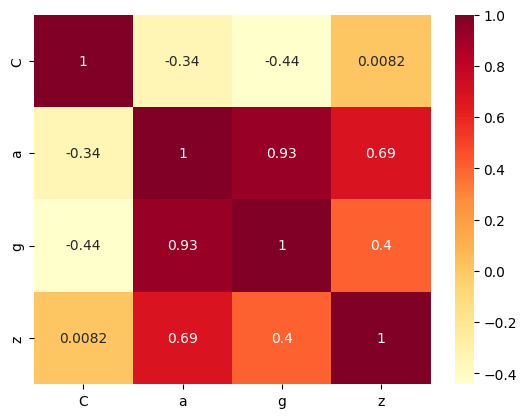

In [177]:
hmap=sns.heatmap(corr_df, annot=True, cmap="YlOrRd")

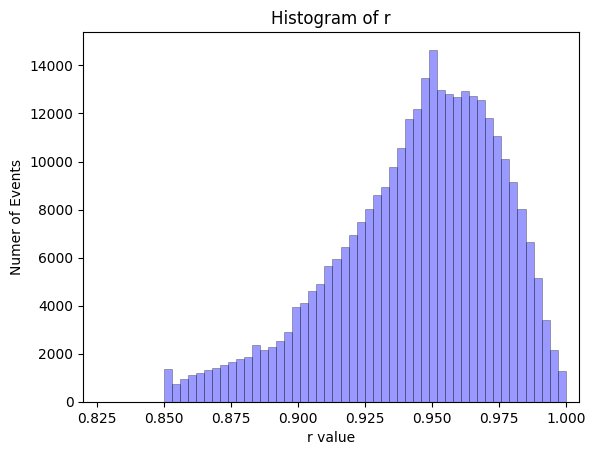

In [178]:
n, bins, patches = plt.hist(r, 50, facecolor='blue', alpha=0.4, edgecolor='black', linewidth = '0.51')

plt.xlabel('r value')
plt.ylabel('Numer of Events')
plt.title('Histogram of r')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0.82,1.005)
#plt.ylim(0, 40)
plt.grid(False)
plt.show()

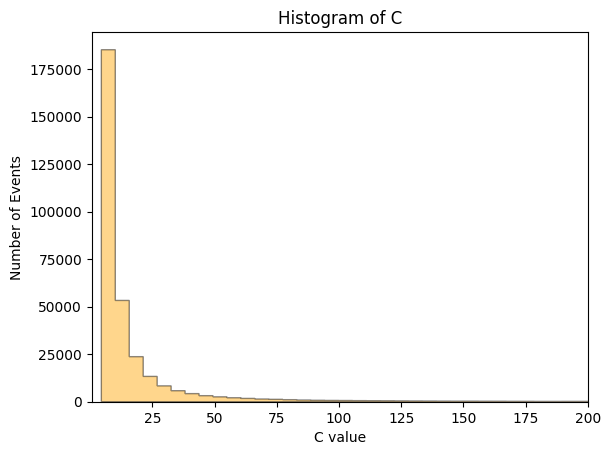

In [179]:
n, bins, patches = plt.hist(C, 2500,  facecolor='orange', histtype='stepfilled', alpha=0.45, ec="k")


plt.xlabel('C value')
plt.ylabel('Number of Events')
plt.title('Histogram of C')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0.7, 200)
#plt.ylim(0, 0.1
plt.show()

Text(0, 0.5, 'Number of Cascades')

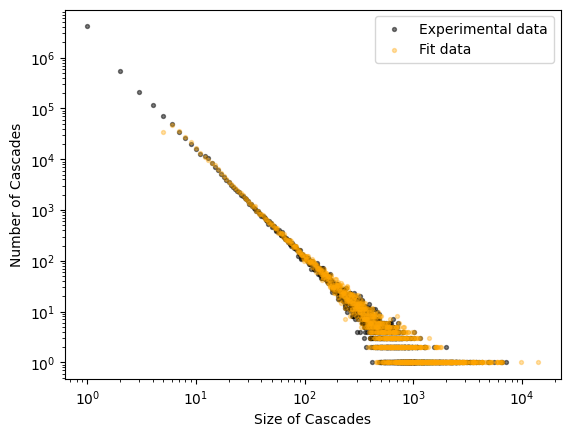

In [180]:
C1 = np.floor(C)+1

#EXPERIMENTAL DATA
data_counts = pd.read_pickle('Covid_counts_de.pkl')
data_counts['Count'].to_pickle('Covid_counts_de2.pkl')
size_distribution = data_counts.groupby('Count')['Count'].count()
size_distribution.head()
tot = size_distribution.sum()
x = np.array(size_distribution.index)
#y = np.array(size_distribution/len(data_counts))
y = np.array(size_distribution)
norm_y = y
max_val2 = max(y)
norm_y = norm_y/max_val2
plt.scatter(x, y, color="black", s=8, alpha = 0.5, label = 'Experimental data')

#FIT DATA
counter1 = Counter(C1)
sizes1 = np.array(list(counter1.keys()))
counts1 = np.array(list(counter1.values()))
max_val = max(counts1)
counts_norm1 = counts1/max_val
plt.scatter(sizes1,counts1, color="orange", s=8, alpha = 0.35, label = 'Fit data')

plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Size of Cascades")
plt.ylabel("Number of Cascades")

In [181]:
print(np.sum(y))

5392367


(0.5, 100000)

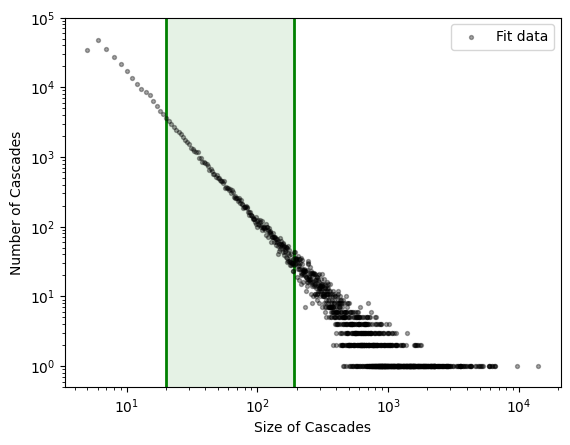

In [182]:
import matplotlib.patches as mpatches

#FIT DATA
counter1 = Counter(C1)
sizes1 = np.array(list(counter1.keys()))
counts1 = np.array(list(counter1.values()))
max_val = max(counts1)
counts_norm1 = counts1/max_val

left, bottom, width, height = (20, -1, 170, 130000)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="green")
rect2=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="green",
                       linewidth=2)
                       #facecolor="red")
plt.gca().add_patch(rect)
plt.gca().add_patch(rect2)

plt.scatter(sizes1,counts1, color="black", s=8, alpha = 0.35, label = 'Fit data')


plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Size of Cascades")
plt.ylabel("Number of Cascades")
plt.ylim(0.5, 100000)

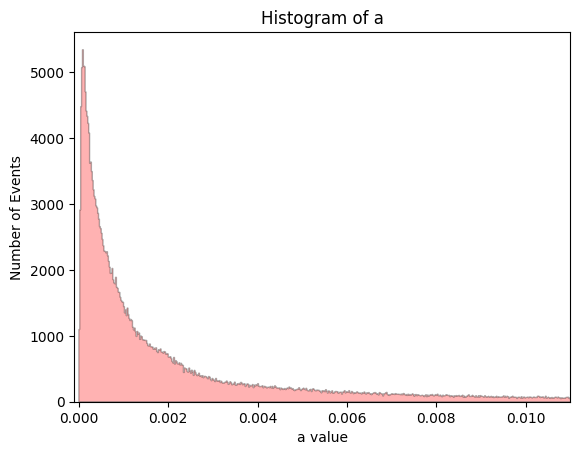

In [183]:
amod = a[a<0.2]
n1, bins1, patches1 = plt.hist(amod, 10000, facecolor='r', histtype='stepfilled', alpha=0.3, ec="k")

plt.xlabel('a value')
plt.ylabel('Number of Events')
plt.title('Histogram of a')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(-0.0001, 0.011)
#plt.ylim(0, 0.1)
plt.grid(False)
plt.show()

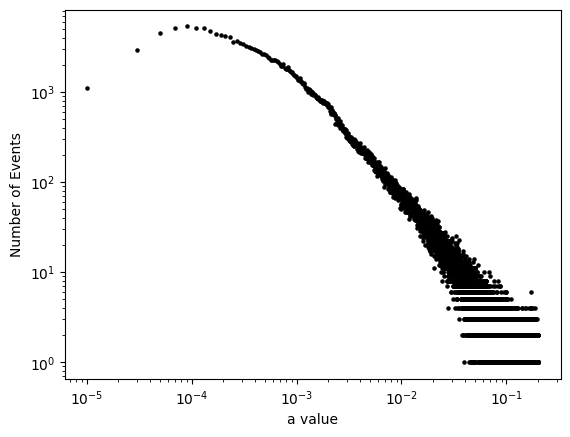

In [184]:
mid=(bins1[1]-bins1[0])/2
x1=bins1+mid
y1=n1
#y1=n2/(max(n2))
x1=x1[0:10000]
#x1=x1[0:2500]+(5-x1[0]) #tem que se puxar para 1 no eixo dos x, porque o hist centra a abcissa no meio da barra

plt.xlabel('a value')
plt.ylabel('Number of Events')
#plt.plot(x1, y1, '.', label='data')
#plt.bar(x1,y1, width = 2*mid, alpha = 0.6)
plt.scatter(x1, y1, color="black", s=5)
#plt.xlim(1,300)
#plt.ylim([10e-7, 1])
plt.yscale("log")
plt.xscale("log")

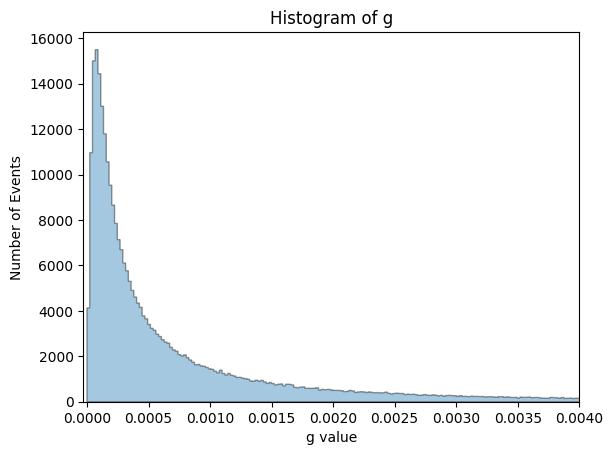

In [185]:
gmod = g[g<0.0041]

n1, bins1, patches1 = plt.hist(g, 30000, histtype='stepfilled', alpha=0.4, ec="k")

plt.xlabel('g value')
plt.ylabel('Number of Events')
plt.title('Histogram of g')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(-0.00003, 0.004)
#plt.ylim(0, 0.1)
plt.grid(False)
plt.show()

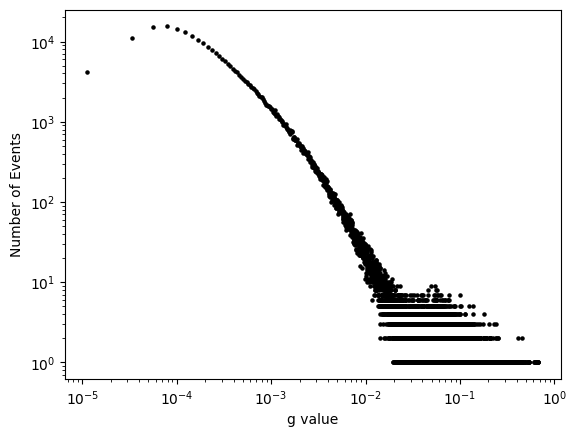

In [186]:
mid=(bins1[1]-bins1[0])/2
x1=bins1+mid
y1=n1
#y1=n2/(max(n2))
x1=x1[0:30000]
#x1=x1[0:2500]+(5-x1[0]) #tem que se puxar para 1 no eixo dos x, porque o hist centra a abcissa no meio da barra

plt.xlabel('g value')
plt.ylabel('Number of Events')
#plt.plot(x1, y1, '.', label='data')
#plt.bar(x1,y1, width = 2*mid, alpha = 0.6)
plt.scatter(x1, y1, color="black", s=5)
#plt.xlim(1,300)
#plt.ylim([10e-7, 1])
plt.yscale("log")
plt.xscale("log")

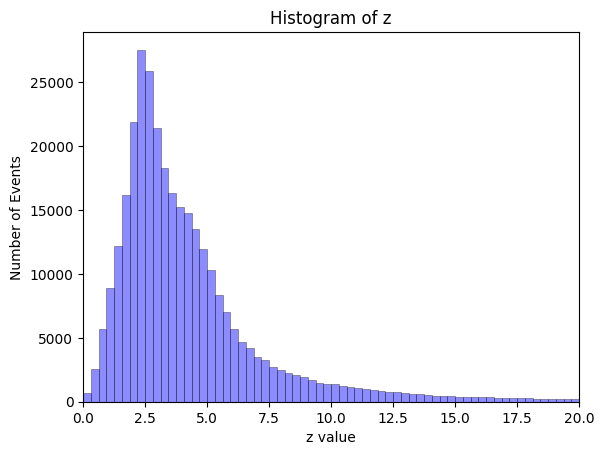

In [187]:
agmod = ag[ag<25]
agmod= agmod[agmod>0]

n1, bins1, patches1 = plt.hist(agmod, 80, facecolor='b', alpha=0.45 , edgecolor='black', linewidth = '0.51')

plt.xlabel('z value')
plt.ylabel('Number of Events')
plt.title('Histogram of z')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 20)
#plt.ylim(0, 0.1)
plt.show()

In [188]:
data2=data[data.C>10]
#data2=data2[data2.C<200]

Ct = data2['C']
agt = -1 * data2['a'] 
gt = data2['g']
#shift = data['shift']
rt = data2['r']
at = -1 * data2['a']*data2['g']
at.columns = ["a"]

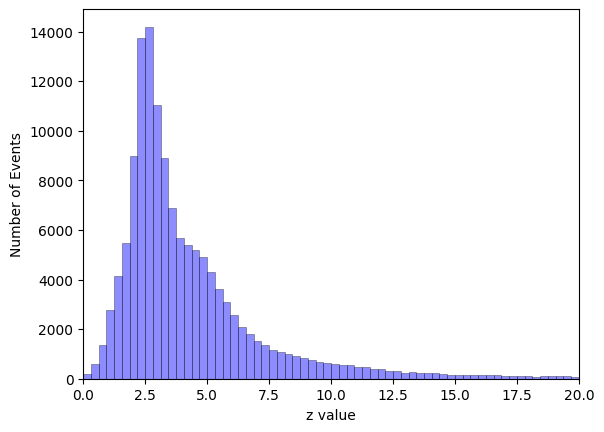

In [189]:
agtmod = agt[ag<25]
agtmod= agtmod[agtmod>0]

n1, bins1, patches1 = plt.hist(agtmod, 80, facecolor='b', alpha=0.45, edgecolor='black', linewidth = '0.51')

plt.xlabel('z value')
plt.ylabel('Number of Events')
#plt.title('Histogram of z')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 20)
#plt.ylim(0, 0.1)
plt.grid(False)
plt.show()

In [190]:
data2=data[data.C>70]
#data2=data2[data2.C<100]

Ct = data2['C']
agt = -1 * data2['a'] 
gt = data2['g']
#shift = data['shift']
rt = data2['r']
at = -1 * data2['a']*data2['g']
at.columns = ["a"]

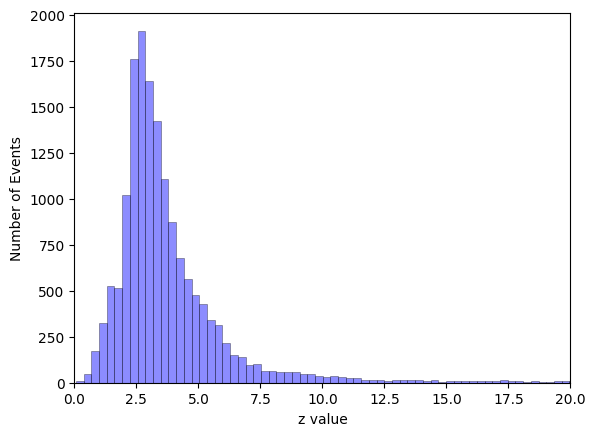

In [191]:
agtmod = agt[ag<25]
agtmod= agtmod[agtmod>0]

n1, bins1, patches1 = plt.hist(agtmod, 80, facecolor='b', alpha=0.45, edgecolor='black', linewidth = '0.51')

plt.xlabel('z value')
plt.ylabel('Number of Events')
#plt.title('Histogram of z')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 20)
#plt.ylim(0, 0.1)
plt.grid(False)
plt.show()

(0.5, 100000)

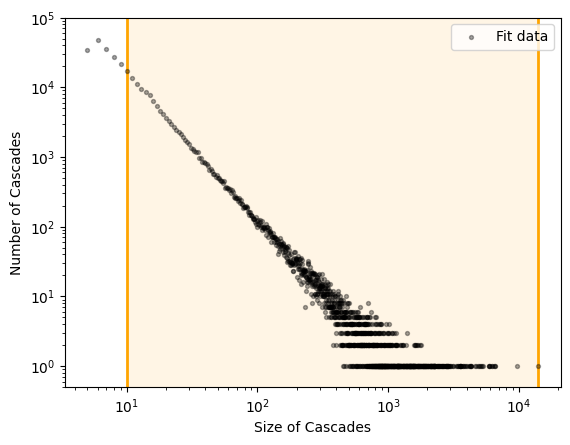

In [192]:
import matplotlib.patches as mpatches

#FIT DATA
counter1 = Counter(C1)
sizes1 = np.array(list(counter1.keys()))
counts1 = np.array(list(counter1.values()))
max_val = max(counts1)
counts_norm1 = counts1/max_val

left, bottom, width, height = (10, -1, 14000, 130000)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="orange")
rect2=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="orange",
                       linewidth=2)
                       #facecolor="red")
plt.gca().add_patch(rect)
plt.gca().add_patch(rect2)

plt.scatter(sizes1,counts1, color="black", s=8, alpha = 0.35, label = 'Fit data')


plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Size of Cascades")
plt.ylabel("Number of Cascades")
plt.ylim(0.5, 100000)

(0.5, 100000)

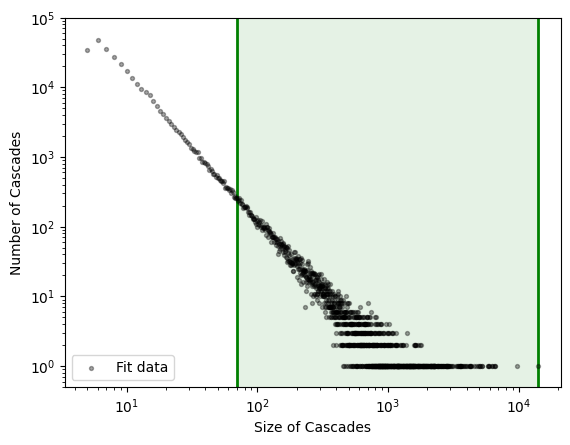

In [193]:
import matplotlib.patches as mpatches

#FIT DATA
counter1 = Counter(C1)
sizes1 = np.array(list(counter1.keys()))
counts1 = np.array(list(counter1.values()))
max_val = max(counts1)
counts_norm1 = counts1/max_val

left, bottom, width, height = (70, -1, 14000, 130000)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="green")
rect2=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="green",
                       linewidth=2)
                       #facecolor="red")
plt.gca().add_patch(rect)
plt.gca().add_patch(rect2)

plt.scatter(sizes1,counts1, color="black", s=8, alpha = 0.35, label = 'Fit data')


plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Size of Cascades")
plt.ylabel("Number of Cascades")
plt.ylim(0.5, 100000)